In [15]:
library(tidyverse)
library(mvtnorm)
options(repr.plot.width=4, repr.plot.height=4)

## Correlação linear de Pearson

Apresenta os comandos em R para o cálculo da covariância amostral e do coeficiente de correlação de Pearson entre as variáveis $Y$ e $X$.

Os calculos são feitos *manualmente* com as fórmulas disponíveis [aqui](https://github.com/FCopf/probest-apresentacoes/blob/master/pdf_presentations/Teste_t.pdf) e também utilizando as funções do R.

#### Inventando um conjunto de dados

In [2]:
rpop <- 0.5
s1 <- 20; s2 <- 30
m1 <- 100; m2 <- 50
n <- 10
covs <- rpop * sqrt(s1) * sqrt(s2)
cov_mat <- matrix(c(s1, covs,
                    covs, s2),
                  2,2)
set.seed(2)
df <- mvtnorm::rmvnorm(n = n, mean = c(m1, m2), sigma = cov_mat) %>% as_tibble() %>% 
      rename(X = V1, Y = V2) %>% round(2)

Warning message:
"`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session."

#### A tabela de dados

In [3]:
df

X,Y
96.39,49.84
105.37,46.00
99.82,50.60
102.73,49.63
108.33,51.79
103.04,55.76
96.99,43.96
104.70,39.96
103.81,51.31
104.89,53.59


#### O gráfico de dispersão

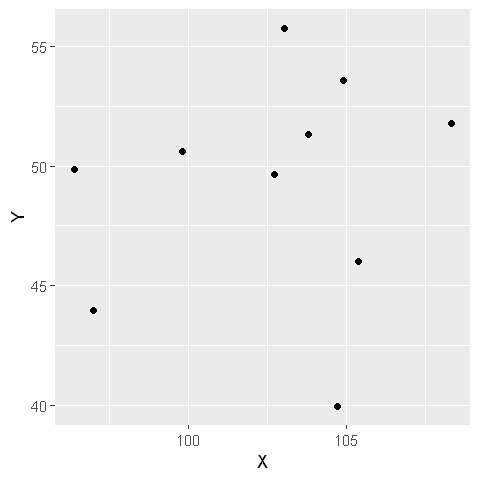

In [4]:
ggplot(df, mapping = aes(x = X, y = Y)) +
    geom_point()

#### Covariância: cálculos intermediários passo-a-passo

In [5]:
df = df %>% 
    mutate(dX = X - mean(X),
          dY = Y - mean(Y),
          dX2 = dX^2,
          dY2 = dY^2)
df

X,Y,dX,dY,dX2,dY2
96.39,49.84,-6.217,0.596,38.651089,0.355216
105.37,46.00,2.763,-3.244,7.634169,10.523536
99.82,50.60,-2.787,1.356,7.767369,1.838736
102.73,49.63,0.123,0.386,0.015129,0.148996
108.33,51.79,5.723,2.546,32.752729,6.482116
103.04,55.76,0.433,6.516,0.187489,42.458256
96.99,43.96,-5.617,-5.284,31.550689,27.920656
104.70,39.96,2.093,-9.284,4.380649,86.192656
103.81,51.31,1.203,2.066,1.447209,4.268356
104.89,53.59,2.283,4.346,5.212089,18.887716


Soma dos produtos cruzados ($SQ_{YX}$)

In [6]:
SQyx = sum(df$dX * df$dY)

Covariância entre $X$ e $Y$: $S_{YX} = \frac{SQ_{YX}}{n-1}$

In [7]:
Syx = SQyx / (n-1)
Syx

[1] 2.627569

#### Covariância: função no R

In [8]:
cov(df$X, df$Y)

[1] 2.627569

#### Correlação de Pearson: cálculos intermediários

Soma dos quadrados de $X$ ($SQ_X$) e de $Y$ ($SQ_Y$)

In [9]:
SQx = sum(df$dX^2)
SQy = sum(df$dY^2)

#### Coeficiente de Correlação de Pearson: passo-a-passo

In [10]:
r = SQyx / (sqrt(SQy) * sqrt(SQx))
r

[1] 0.1472268

#### Coeficiente de Correlação de Pearson: função no R

In [11]:
cor(df$Y, df$X)

[1] 0.1472268

#### Teste de hipóteses sobre o r: passo-a-passo

In [12]:
tcalculado = r / sqrt((1 - r^2)/(n-2))
tcalculado

[1] 0.421008

$t$ crítico bicaudal

In [13]:
tcritico = qt(p = 0.975, df = n-2)
tcritico

[1] 2.306004

Se $|t_{caclulado}| < |t_{crítico}|$: aceita $H_0$

Se $|t_{caclulado}| \ge |t_{crítico}|$: rejeita $H_0$

#### Teste de hipóteses sobre o r: função no R

In [14]:
cor.test(df$Y, df$X)


	Pearson's product-moment correlation

data:  df$Y and df$X
t = 0.42101, df = 8, p-value = 0.6848
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5316857  0.7109496
sample estimates:
      cor 
0.1472268 
